# CREDIT CARD FRAUD DETECTION

## IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

### Setting the random seed for reproducibility

In [6]:
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

## IMPORTING THE datasetSET

In [9]:
dataset = pd.read_csv('creditcard.csv')

## ANALYSING THE datasetSET

In [12]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
dataset.isnull().values.any()

False

### Plotting the transaction class distribution

/var/folders/pn/d0x5whnx06nf2m3tybgx7k8w0000gn/T/ipykernel_67528/2426841557.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'], sort=True)


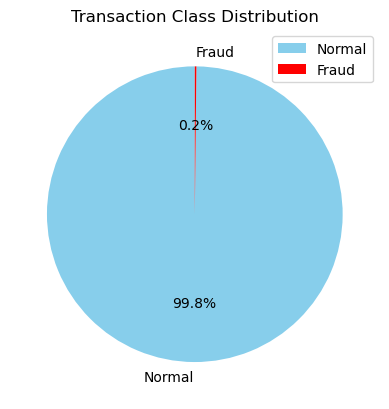

In [21]:
count_classes = pd.value_counts(dataset['Class'], sort=True)
count_classes.plot(kind='pie', labels=LABELS, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title("Transaction Class Distribution")
plt.legend()
plt.ylabel('')
plt.show()

## Separating the fraud and normal transactions

In [23]:
fraud = dataset[dataset['Class'] == 1]
normal = dataset[dataset['Class'] == 0]

In [24]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


### Analyzing the amount of money used in different transaction classes

In [29]:
print(fraud['Amount'].describe())
print(normal['Amount'].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


### Visualizing the amount per transaction by class

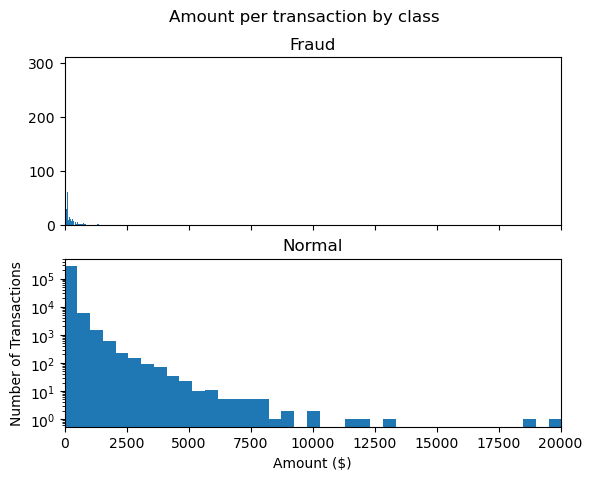

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud['Amount'], bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal['Amount'], bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

## Visualizing time vs. amount by class

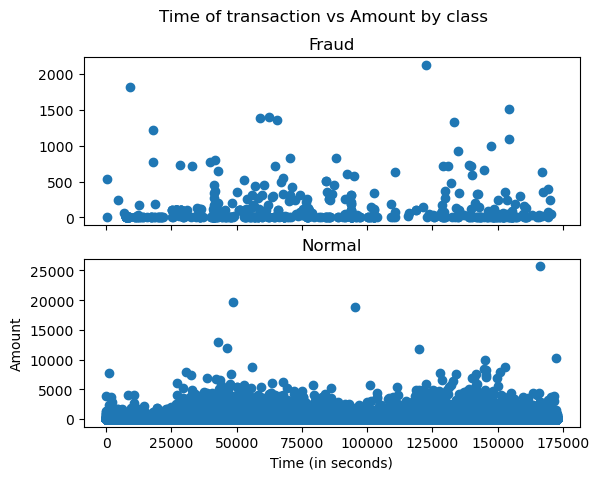

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud['Time'], fraud['Amount'])
ax1.set_title('Fraud')
ax2.scatter(normal['Time'], normal['Amount'])
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

## Correlation matrix

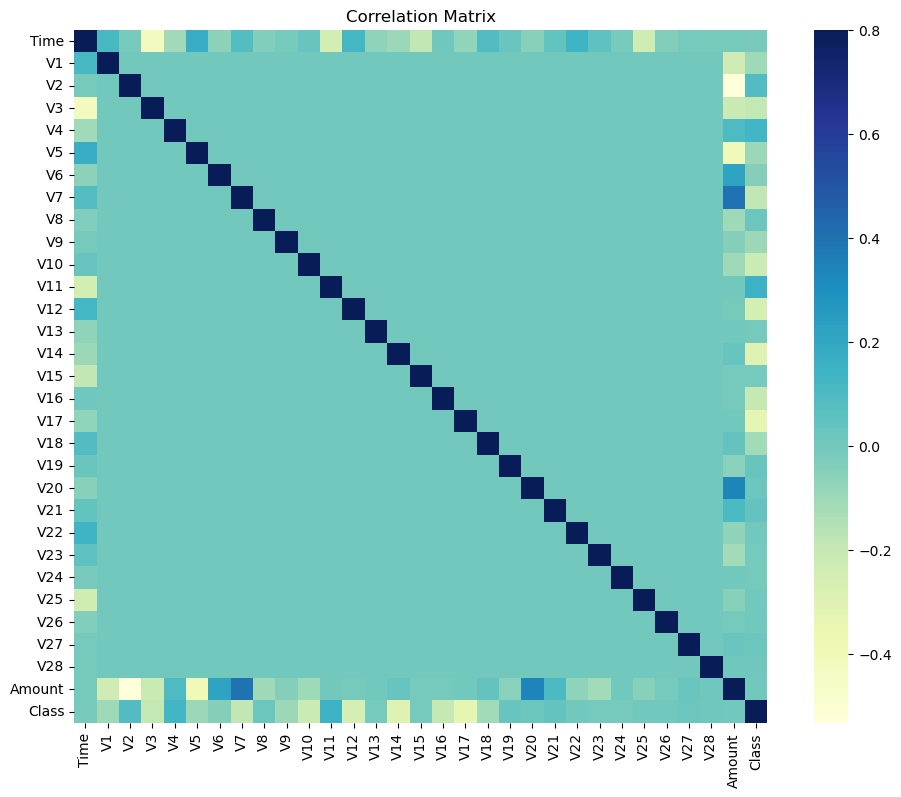

In [37]:
corrmat = dataset.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

## Distribution of transaction amounts

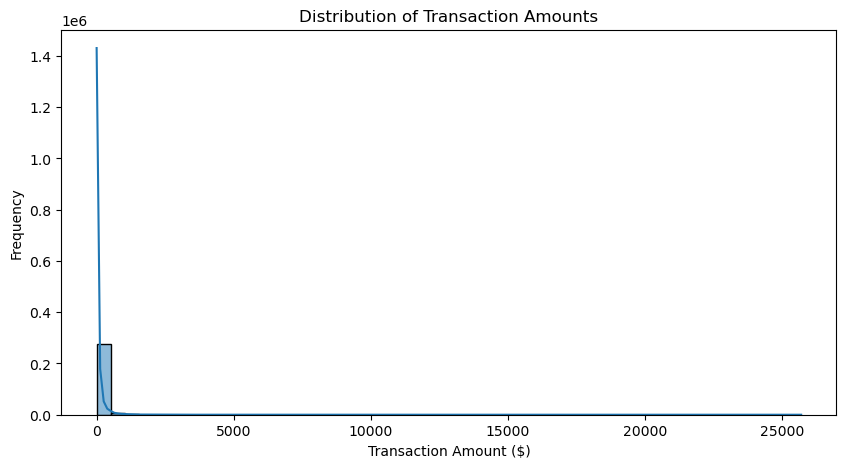

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()

## Distribution of transaction time

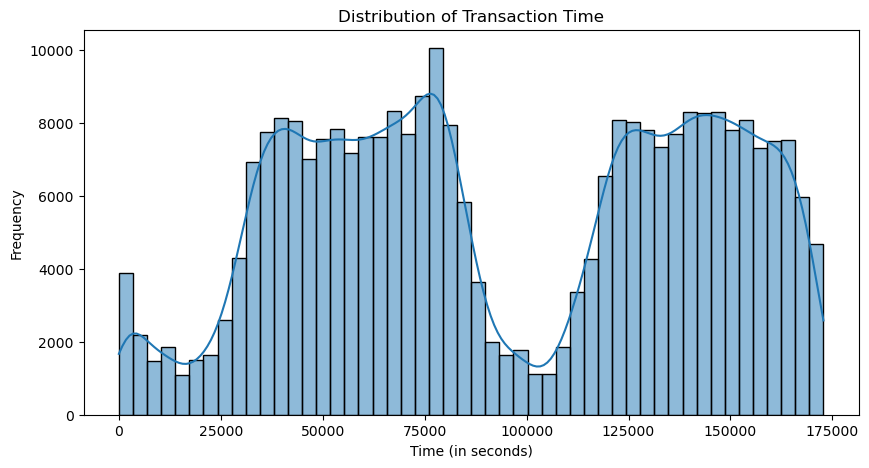

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

## Plotting amounts by class

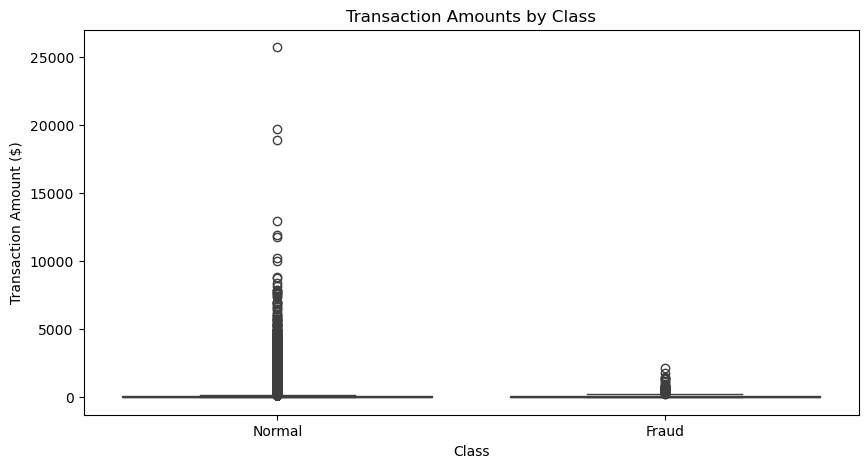

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=dataset)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount ($)')
plt.xticks([0, 1], LABELS)
plt.show()

## Identifying outliers using Isolation Forest

In [46]:
isolation_forest = IsolationForest(contamination=0.1, random_state=RANDOM_SEED)
dataset['anomaly'] = isolation_forest.fit_predict(dataset[['Amount', 'Time']])
outliers = dataset[dataset['anomaly'] == -1]
inliers = dataset[dataset['anomaly'] == 1]

# Plotting outliers

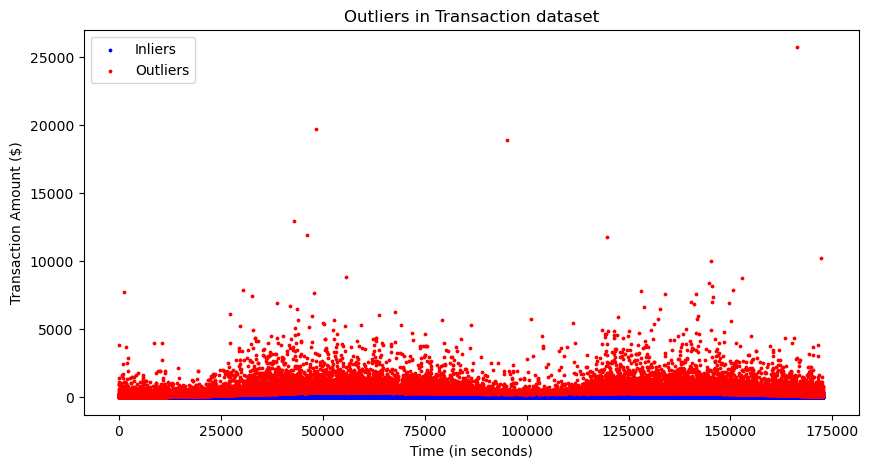

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(inliers['Time'], inliers['Amount'], label='Inliers', c='blue', s=3)
plt.scatter(outliers['Time'], outliers['Amount'], label='Outliers', c='red', s=3)
plt.title('Outliers in Transaction dataset')
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Amount ($)')
plt.legend()
plt.show()

## Sampling the data

In [51]:
data1 = dataset.sample(frac=0.1, random_state=RANDOM_SEED)
print(data1.shape)
print(dataset.shape)

(28481, 32)
(284807, 32)


### Determine the number of fraud and valid transactions in the datasetset

In [53]:
Fraud = dataset[dataset['Class'] == 1]
Valid = dataset[dataset['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))

In [54]:
print(outlier_fraction)
print(f"Fraud Cases: {len(Fraud)}")
print(f"Valid Cases: {len(Valid)}")

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


### Determine the number of fraud and valid transactions in the datasetset [sample]

In [57]:
Fraud = data1[data1['Class'] == 1]
Valid = data1[data1['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))

print(outlier_fraction)
print(f"Fraud Cases: {len(Fraud)}")
print(f"Valid Cases: {len(Valid)}")

0.001617724635132759
Fraud Cases: 46
Valid Cases: 28435


## Creating independent and dependent features

In [59]:
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class", "anomaly"]]
target = "Class"

x = data1[columns]
y = data1[target]

### Standardizing the features

In [61]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Handling the imbalanced dataset using SMOTE

In [63]:
smote = SMOTE(random_state=RANDOM_SEED)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

## Splitting the datasetset into training and testing sets

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=RANDOM_SEED)

## Training the RANDOM FOREST MODEL

In [68]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Priticting the Test set values

In [81]:
y_pred_rf = rf_clf.predict(x_test)

## Evaluating Random Forest model

In [83]:
print("Random Forest")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy Score: 0.9998241603657464
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8513
           1       1.00      1.00      1.00      8548

    accuracy                           1.00     17061
   macro avg       1.00      1.00      1.00     17061
weighted avg       1.00      1.00      1.00     17061



## Confusion Matrix for Random Forest

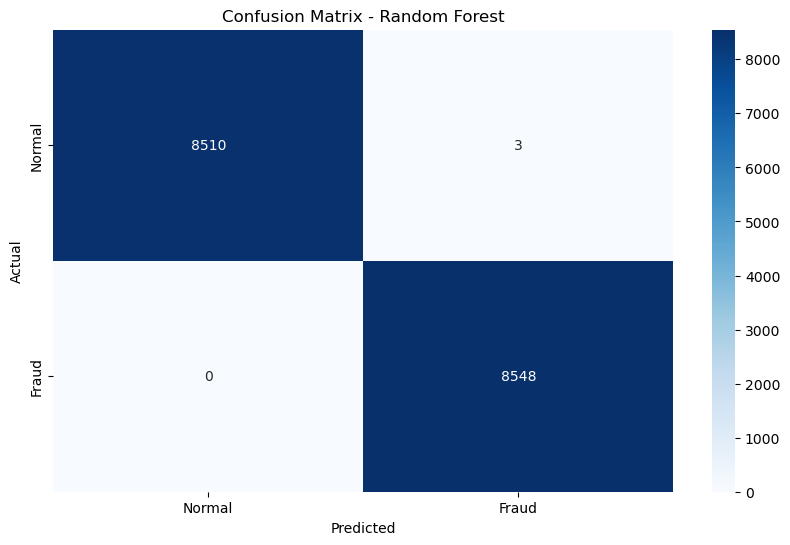

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC Curve for Random Forest

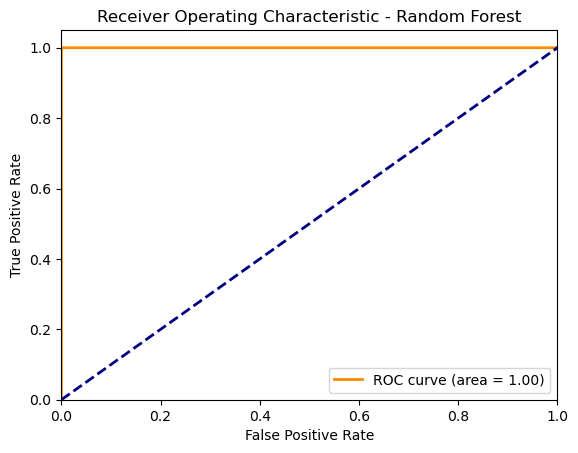

In [87]:
fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Conclusion